In [81]:
import cPickle
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from IPython import display
%matplotlib inline

In [2]:
# Load in our pretty pandas database
with open("modis.pkl") as fpd:
    modis = cPickle.load(fpd)
print "loaded pandas database with %d points" %len(modis)

loaded pandas database with 31697705 points


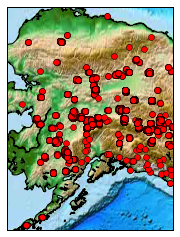

In [224]:
# Let's try out basemap!
ak_bb = [55, 71, -165, -138]
mp = Basemap(projection="merc",
              lat_0=55, lon_0=-165,
              llcrnrlat=55,
              llcrnrlon=-165,
              urcrnrlat=71,
              urcrnrlon=-138,
              resolution='i')
mp.etopo()
mp.drawmapboundary(fill_color='aqua')
#mp.fillcontinents(color='yellow',lake_color='aqua')
mp.drawcoastlines()

ak_fires = modis[(modis.lat < 71) & (modis.lat > 55) & (modis.long > -165) & (modis.long < -138)]
ak_summer_fires = ak_fires[(ak_fires.year == 2013) & (ak_fires.month >= 6) & (ak_fires.month <= 8)]
#mp_long, mp_lat = mp(ak_summer_fires.long, ak_summer_fires.lat)
mp_long, mp_lat = mp(np.array(ak_summer_fires.long), np.array(ak_summer_fires.lat))
mp.plot(mp_long, mp_lat, 'ro')
plt.show()

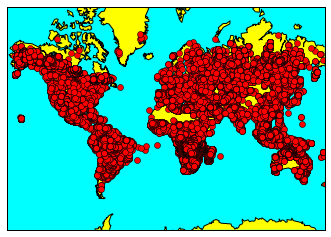

In [66]:
# Let's plot the whole world for the lulz during one month
mp = Basemap(projection="merc",
              lat_0=0, lon_0=0,
              llcrnrlat=-70,
              llcrnrlon=-170,
              urcrnrlat=80,
              urcrnrlon=170)
mp.drawmapboundary(fill_color='aqua')
mp.fillcontinents(color='yellow',lake_color='aqua')
mp.drawcoastlines()

#ak_fires = modis[(modis.lat < 71) & (modis.lat > 55) & (modis.long > -165) & (modis.long < -138)]
june_2013 = modis[(modis.year == 2013) & (modis.month == 6)]
mp_long, mp_lat = mp(np.array(june_2013.long), np.array(june_2013.lat))
mp.plot(mp_long, mp_lat, 'ro')
plt.show()

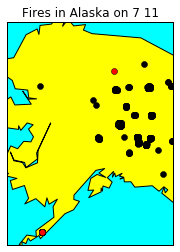

KeyboardInterrupt: 

In [120]:
%matplotlib inline
# Plot AK fires over time
ak_bb = [55, 71, -165, -138]
mp = Basemap(projection="merc",
              lat_0=55, lon_0=-165,
              llcrnrlat=55,
              llcrnrlon=-165,
              urcrnrlat=71,
              urcrnrlon=-138)
mp.drawmapboundary(fill_color='aqua')
mp.fillcontinents(color='yellow',lake_color='aqua')
mp.drawcoastlines()

ak_fires = modis[(modis.lat < 71) & (modis.lat > 55) & (modis.long > -165) & (modis.long < -138)]
#ak_summer_fires = ak_fires[(ak_fires.year == 2013) & (ak_fires.month >= 6) & (ak_fires.month <= 8)]
#mp_long, mp_lat = mp(ak_summer_fires.long, ak_summer_fires.lat)
month = 7
day = 1
prev_lats = []
prev_longs = []
while month < 9:
    todays_fires = ak_fires[(ak_fires.year == 2013) & (ak_fires.month == month) &
                            (ak_fires.day == day)]
    display.clear_output(wait=True)
    mp.drawmapboundary(fill_color='aqua')
    mp.fillcontinents(color='yellow',lake_color='aqua')
    mp.drawcoastlines()
    if len(prev_lats):
        mp.plot(prev_longs, prev_lats, 'ko')
    if len(todays_fires):
        today_longs, today_lats = mp(np.array(todays_fires.long), np.array(todays_fires.lat))
        mp.plot(today_longs, today_lats, 'ro')
        prev_lats += list(today_lats)
        prev_longs += list(today_longs)
    plt.title("Fires in Alaska on %d %d" %(month, day))
    plt.show()
    time.sleep(1)
    day += 1
    if day >= 31 or (day >= 30 and month == 6):
        day = 1
        month += 1

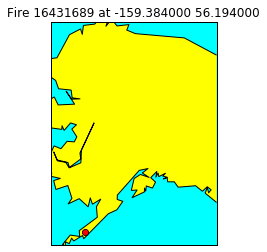

In [121]:
# Ok, so I want to focus in on the fire we discussed last week, but first I have to get the
# coordinates. So I'm going to plot each point on the first day with its coordinates until I
# get to one in that big fire
july_1_fires = ak_fires[(ak_fires.year == 2013) & (ak_fires.day == 9) & (ak_fires.month == 7)]
prev_longs = []
prev_lats = []
for i,fire in july_1_fires.iterrows():
    display.clear_output(wait=True)
    mp.drawmapboundary(fill_color='aqua')
    mp.fillcontinents(color='yellow',lake_color='aqua')
    mp.drawcoastlines()
    if len(prev_lats):
        mp.plot(prev_longs, prev_lats, 'ko')
    lon, lat = mp(fire.long, fire.lat)
    mp.plot(lon, lat, 'ro')
    prev_lats.append(lat)
    prev_longs.append(lon)
    plt.title("Fire %d at %f %f" %(i, fire.long, fire.lat))
    plt.show()
    time.sleep(1)
    
# Got it! One of the points is fire ID 16313981 at long -146.715 and lat 64.718

# Now, I want to look at another fire, the one at the tip, so I'll go through and manually 
# isolate it. TODO: automatically isolate a fire, maybe by clicking on a fire pixel or something
# Ok, this one is -159.384, 56.194

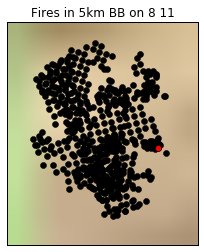

In [225]:
# Now, let's look at that +/- 5 degrees, and iteratively get closer!
fire_bb = [64.6, 64.9, -147, -146.4]
mp = Basemap(projection="merc",
              lat_0=float(fire_bb[0]+fire_bb[1])/2, lon_0=float(fire_bb[2]+fire_bb[3])/2,
              llcrnrlat=fire_bb[0],
              llcrnrlon=fire_bb[2],
              urcrnrlat=fire_bb[1],
              urcrnrlon=fire_bb[3])
my_fires = modis[(modis.lat < fire_bb[1]) & (modis.lat > fire_bb[0]) &
                 (modis.long < fire_bb[3]) & (modis.long > fire_bb[2])]
month = 6
day = 25
prev_lats = []
prev_longs = []
while month < 8 or day < 12:
    todays_fires = my_fires[(my_fires.year == 2013) & (my_fires.month == month) &
                            (my_fires.day == day)]
    display.clear_output(wait=True)
    mp.drawmapboundary(fill_color='aqua')
    #mp.fillcontinents(color='yellow',lake_color='aqua')
    mp.etopo()
    mp.drawcoastlines()
    if len(prev_lats):
        mp.plot(prev_longs, prev_lats, 'ko')
    if len(todays_fires):
        today_longs, today_lats = mp(np.array(todays_fires.long), np.array(todays_fires.lat))
        mp.plot(today_longs, today_lats, 'ro')
        prev_lats += list(today_lats)
        prev_longs += list(today_longs)
    plt.title("Fires in 5km BB on %d %d" %(month, day))
    plt.show()
    time.sleep(1)
    day += 1
    if day >= 31 or (day >= 30 and month == 6):
        day = 1
        month += 1

In [111]:
# Let's understand this fire a little better
my_2013_fires = my_fires[my_fires.year==2013]
print "%d fires in this region %d in 2013" % (len(my_fires), len(my_2013_fires))
earliest_month = min(my_2013_fires.month)
latest_month = max(my_2013_fires.month)
earliest_day = min(my_2013_fires[my_2013_fires.month == earliest_month].day)
latest_day = max(my_2013_fires[my_2013_fires.month == latest_month].day)
print "fires in this region in 2013 range from %d/%d-%d/%d" \
        %(earliest_month,earliest_day, latest_month, latest_day)
# Except not really, there's one fire on 6/1, but it doesn't seem to be a part of this fire.
# The fire actually starts on 6/25
# It really takes off on 7/1


602 fires in this region 584 in 2013
fires in this region in 2013 range from 6/1-8/11


Ok, now I'm going to explain what I see in this fire. There's one fire on 6/1, but it doesn't seem to be a part of this fire. This fire actually starts on 6/25, and really takes off on 7/1

another big day 7/8

nothing from 7/9-7/13

another big break from 7/16-8/3

In some areas, we clearly see a lattice pattern in the detections which seems like an artifact of the data collection process. TODO: how far apart are these "lattice points"?

This seems to indicate that it'll be a bit easier to say which pixels are part of the same fire than I originally thought, though this is only one fire, others could be more difficult. Just do some sort of connected component thing.

The fire process seems bursty, some days you get a shitload and some days you don't get any or very few.

This fire was near Fairbanks, and here's an article that references it https://www.adn.com/environment/article/nation-alaska-deals-costly-fire-season/2013/08/29/

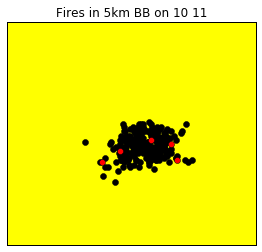

236 fires in this region 236 in 2013
fires in this region in 2013 range from 6/14-10/11


In [216]:
# Manually isolate the second fire
fire_2_bb = [56.15, 56.25, -159.5, -159.3]
mp = Basemap(projection="merc",
              lat_0=float(fire_2_bb[0]+fire_2_bb[1])/2, lon_0=float(fire_2_bb[2]+fire_2_bb[3])/2,
              llcrnrlat=fire_2_bb[0],
              llcrnrlon=fire_2_bb[2],
              urcrnrlat=fire_2_bb[1],
              urcrnrlon=fire_2_bb[3])
my_fires_2 = modis[(modis.lat < fire_2_bb[1]) & (modis.lat > fire_2_bb[0]) &
                   (modis.long < fire_2_bb[3]) & (modis.long > fire_2_bb[2])]
month = 6
day = 14
prev_lats = []
prev_longs = []
while month < 10 or day <= 11:
    todays_fires = my_fires_2[(my_fires_2.year == 2013) & (my_fires_2.month == month) &
                            (my_fires_2.day == day)]
    display.clear_output(wait=True)
    mp.drawmapboundary(fill_color='aqua')
    mp.fillcontinents(color='yellow',lake_color='aqua')
    mp.drawcoastlines()
    if len(prev_lats):
        mp.plot(prev_longs, prev_lats, 'ko')
    if len(todays_fires):
        today_longs, today_lats = mp(np.array(todays_fires.long), np.array(todays_fires.lat))
        mp.plot(today_longs, today_lats, 'ro')
        prev_lats += list(today_lats)
        prev_longs += list(today_longs)
    plt.title("Fires in 5km BB on %d %d" %(month, day))
    plt.show()
    time.sleep(1)
    day += 1
    if day >= 31 or (day >= 30 and month == 6):
        day = 1
        month += 1
        
my_2013_fires_2 = my_fires_2[my_fires_2.year==2013]
print "%d fires in this region %d in 2013" % (len(my_fires_2), len(my_2013_fires_2))
earliest_month = min(my_2013_fires_2.month)
latest_month = max(my_2013_fires_2.month)
earliest_day = min(my_2013_fires_2[my_2013_fires_2.month == earliest_month].day)
latest_day = max(my_2013_fires_2[my_2013_fires_2.month == latest_month].day)
print "fires in this region in 2013 range from %d/%d-%d/%d" \
        %(earliest_month,earliest_day, latest_month, latest_day)

Now, this fire only has a couple big days, and burns along nicely during July, but then has large gaps between fires, but keeps burning at least a little until October 11.

5464 wisconsin fires


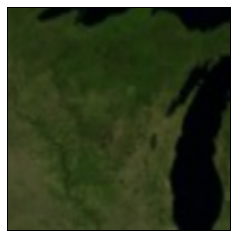

In [157]:
# Now, does basemap show lakes? I'm going to plot the area around Wisconsin to investigate
wisconsin_bb = [42, 47, -93, -86]
mp = Basemap(projection="merc",
              lat_0=float(wisconsin_bb[0]+wisconsin_bb[1])/2, lon_0=float(wisconsin_bb[2]+wisconsin_bb[3])/2,
              llcrnrlat=wisconsin_bb[0],
              llcrnrlon=wisconsin_bb[2],
              urcrnrlat=wisconsin_bb[1],
              urcrnrlon=wisconsin_bb[3])

wisconsin_fires = modis[(modis.lat < wisconsin_bb[1]) & (modis.lat > wisconsin_bb[0]) &
                        (modis.long < wisconsin_bb[3]) & (modis.long > wisconsin_bb[2])]
print "%d wisconsin fires" %(len(wisconsin_fires))
#mp.drawmapboundary(fill_color='aqua')
#mp.fillcontinents(color='yellow',lake_color='aqua')
#mp.drawcoastlines()
mp.bluemarble()

Eww, ugly wisconsin! what happened to door county? Looks like they don't do internal lakes, though at least they do great lakes. let's zoom in on lake winnebago just to be sure

Also, we can drawlsmask() instead of mp.fillcontinents() and drawcoastlines() and stuff cause it's a bit more accurate. Still doesn't seem to pick up lakes though

bluemarble() makes pretty pictures, but I'm not sure that'll easily detect lakes and shit

37 wisconsin fires


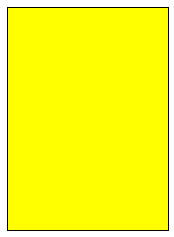

In [152]:
winnebago_bb = [43.8, 44.2, -88.6, -88.2]
mp = Basemap(projection="merc",
              lat_0=float(winnebago_bb[0]+winnebago_bb[1])/2, lon_0=float(winnebago_bb[2]+winnebago_bb[3])/2,
              llcrnrlat=winnebago_bb[0],
              llcrnrlon=winnebago_bb[2],
              urcrnrlat=winnebago_bb[1],
              urcrnrlon=winnebago_bb[3])

winnebago_fires = modis[(modis.lat < winnebago_bb[1]) & (modis.lat > winnebago_bb[0]) &
                        (modis.long < winnebago_bb[3]) & (modis.long > winnebago_bb[2])]
print "%d wisconsin fires" %(len(winnebago_fires))
mp.drawmapboundary(fill_color='aqua')
mp.fillcontinents(color='yellow',lake_color='aqua')
mp.drawcoastlines()
mp.drawrivers()

# Nope! No Winnebago

## Clustering
Not sure how to do this in the nlogn way, so I'm going to do some stupid N^2 BS for now. Given a distance threshold, create the NxN connectivity matrix and run a connected component thing on them

In [203]:
import scipy.sparse as sp
deg_thresh = .05
ak_fires_2013 = ak_fires[ak_fires.year == 2013]
N = len(ak_fires_2013)
thresh_graph = sp.lil_matrix((N,N))
lat_long_mat = np.transpose(np.array((np.array(ak_fires_2013.lat),np.array(ak_fires_2013.long))))
print "lat_long_mat shape: " + str(lat_long_mat.shape)
for i in xrange(N):
    p_i = np.array([ak_fires_2013.iloc[i].lat, ak_fires_2013.iloc[i].long])
    dist_arr = np.linalg.norm(lat_long_mat - p_i, axis=1)
    thresh_arr = dist_arr < deg_thresh
    thresh_graph[i,:] = thresh_arr
#    for j in xrange(i+1,N):
#        p_j = np.array([ak_fires_2013.iloc[j].lat, ak_fires_2013.iloc[j].long])
#        dist = np.linalg.norm(p_i - p_j)
#        if dist < deg_thresh:
#            thresh_graph[i,j] = 1
    if i % 1000 == 0:
        print "finished %d of %d" %(i, N)
n_CCs, CCs = sp.csgraph.connected_components(thresh_graph, directed=False)
print "%d connected components" %(n_CCs)

lat_long_mat shape: (9588, 2)
finished 0 of 9588
finished 1000 of 9588
finished 2000 of 9588
finished 3000 of 9588
finished 4000 of 9588
finished 5000 of 9588
finished 6000 of 9588
finished 7000 of 9588
finished 8000 of 9588
finished 9000 of 9588
174 connected components


174 connected components


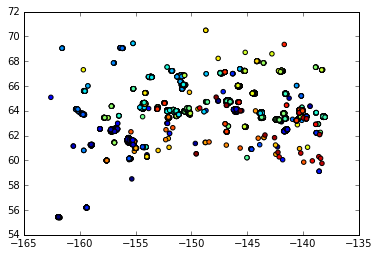

In [204]:
print "%d connected components" %(n_CCs)
#mp = Basemap(projection="merc",
#              lat_0=55, lon_0=-165,
#              llcrnrlat=55,
#              llcrnrlon=-165,
#              urcrnrlat=71,
#              urcrnrlon=-138)
#mp.drawmapboundary(fill_color='aqua')
#mp.fillcontinents(color='yellow',lake_color='aqua')
#mp.drawcoastlines()
today_longs, today_lats = np.array(ak_fires_2013.long), np.array(ak_fires_2013.lat)
plt.scatter(today_longs, today_lats, c=CCs)
plt.show()

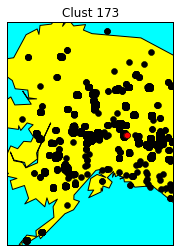

In [206]:
# Plot the clusters one by one, see if things make sense
prev_lats = []
prev_longs = []
for clust in xrange(n_CCs):
    clust_fires = ak_fires_2013.iloc[np.where(CCs == clust)]
    display.clear_output(wait=True)
    mp.drawmapboundary(fill_color='aqua')
    mp.fillcontinents(color='yellow',lake_color='aqua')
    mp.drawcoastlines()
    if len(prev_lats):
        mp.plot(prev_longs, prev_lats, 'ko')
    if len(clust_fires):
        clust_longs, clust_lats = mp(np.array(clust_fires.long), np.array(clust_fires.lat))
        mp.plot(clust_longs, clust_lats, 'ro')
        prev_lats += list(clust_lats)
        prev_longs += list(clust_longs)
    plt.title("Clust %d" %(clust))
    plt.show()
    time.sleep(1)

[9389, 7935, 5919, 4159, 2140, 233, 174, 167, 166, 135]


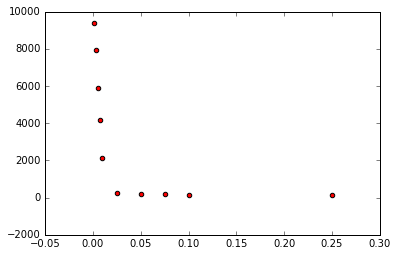

In [202]:
# Try several different cuts, see if there's an obvious cutoff
#threshes = [.001, .003, .005, .007, .01, .025, .05, .075, .1, .25]
#n_ccs_list = []
#lat_long_mat = np.transpose(np.array((np.array(ak_fires_2013.lat),np.array(ak_fires_2013.long))))
#for thresh in threshes:
#    thresh_graph = sp.lil_matrix((N,N))
#    for i in xrange(N):
#        p_i = np.array([ak_fires_2013.iloc[i].lat, ak_fires_2013.iloc[i].long])
#        dist_arr = np.linalg.norm(lat_long_mat - p_i, axis=1)
#        thresh_arr = dist_arr < thresh
#        thresh_graph[i,:] = thresh_arr
#    print "Finished threshold %f" %thresh
#    n_CCs, CCs = sp.csgraph.connected_components(thresh_graph, directed=False)
#    n_ccs_list.append(n_CCs)
print n_ccs_list
plt.close()
plt.scatter(threshes, n_ccs_list, c='r')
plt.show()

# So starting at a threshold of about .025 = 2.775 km (and especially .05 = 5.55 km),
# things start evening out

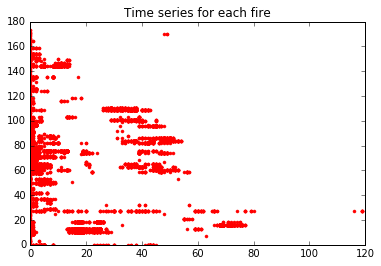

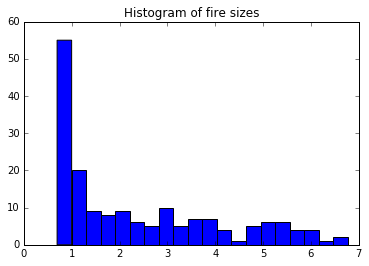

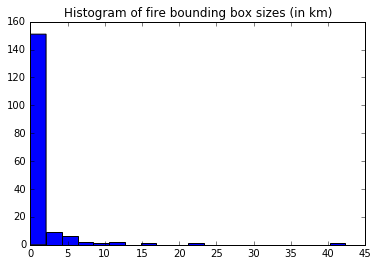

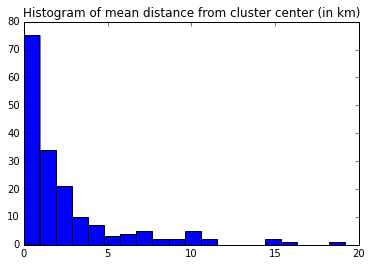

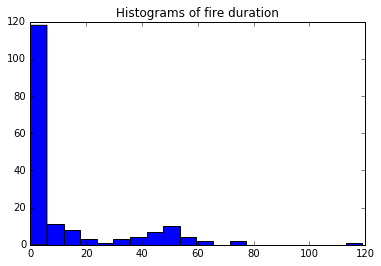

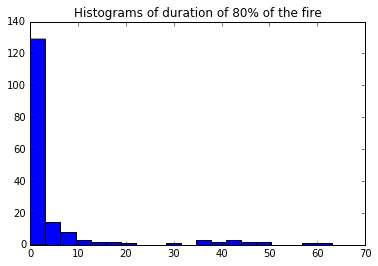

In [217]:
# Let's make some summary stats about the clusters
len_arr = np.zeros(n_CCs)
bb_area_arr = np.zeros(n_CCs)
mean_dist_from_center_arr = np.zeros(n_CCs)
fire_time_arr = np.zeros(n_CCs)
fire_time_80perc_arr = np.zeros(n_CCs)

def monthday2day(month, day, leapyear=False):
    """Convert month/day into days since Jan 1"""
    if leapyear:
        month_arr = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    else:
        month_arr = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    days = 0
    for mon in xrange(1, month):
        days += month_arr[mon - 1]
    days += day - 1
    return days
    
for clust in xrange(n_CCs):
    clust_fires = ak_fires_2013.iloc[np.where(CCs == clust)]
    len_arr[clust] = len(clust_fires)
    mean_lat = np.mean(clust_fires.lat)
    mean_long = np.mean(clust_fires.long)
    min_lat = np.inf
    max_lat = -np.inf
    min_long = np.inf
    max_long = -np.inf
    dist_from_center_arr = []
    for lat,lon in zip(clust_fires.lat, clust_fires.long):
        dist_from_center_arr.append(np.sqrt((lat - mean_lat)**2 + (lon - mean_long)**2))
        if lat < min_lat:
            min_lat = lat
        if lat > max_lat:
            max_lat = lat
        if lon < min_long:
            min_long = lon
        if lon > max_long:
            max_long = lon
    bb_area_arr[clust] = (max_lat - min_lat) * (max_long - min_long)
    mean_dist_from_center_arr[clust] = np.mean(dist_from_center_arr)
    
    time_arr = np.zeros(len(clust_fires))
    for i,(month,day) in enumerate(zip(clust_fires.month, clust_fires.day)):
        my_day = monthday2day(month, day, leapyear=False)
        time_arr[i] = my_day
    sorted_times = np.sort(time_arr)
    plt.plot(sorted_times - sorted_times[0], np.zeros(len(sorted_times)) + clust, 'r.')
    max_day = sorted_times[-1]
    min_day = sorted_times[0]
    fire_time_arr[clust] = max_day - min_day
    if len(clust_fires) < 3:
        fire_time_80perc_arr[clust] = max_day - min_day
        continue
    perc20 = int(.2 * len(clust_fires))
    pot_ranges = np.zeros(perc20+1)
    for n_below in xrange(perc20+1):
        n_above = perc20 - n_below
        if n_above == 0:
            this_range = sorted_times[n_below:]
        else:
            this_range = sorted_times[n_below:-(n_above)]
        pot_ranges[n_below] = this_range[-1] - this_range[0]
    fire_time_80perc_arr[clust] = np.min(pot_ranges)

plt.title("Time series for each fire")
plt.show()

plt.hist(np.log(len_arr + 1), bins=20)
plt.title("Histogram of fire sizes")
plt.show()

plt.hist(bb_area_arr * 111, bins=20)  # convert to km
plt.title("Histogram of fire bounding box sizes (in km)")
plt.show()

plt.hist(mean_dist_from_center_arr * 111, bins=20) # convert to km
plt.title("Histogram of mean distance from cluster center (in km)")
plt.show()

plt.hist(fire_time_arr, bins=20)
plt.title("Histograms of fire duration")
plt.show()

plt.hist(fire_time_80perc_arr, bins=20)
plt.title("Histograms of duration of 80% of the fire")
plt.show()